In [ ]:
# Mount Drive (for Google Colab users)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required libraries


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
os.chdir('/content/drive/MyDrive/final ai assignment ')

In [ ]:
# Load dataset
df = pd.read_csv('heart.csv')

In [ ]:


# Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nTarget Distribution:")
print(df['target'].value_counts())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0     

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


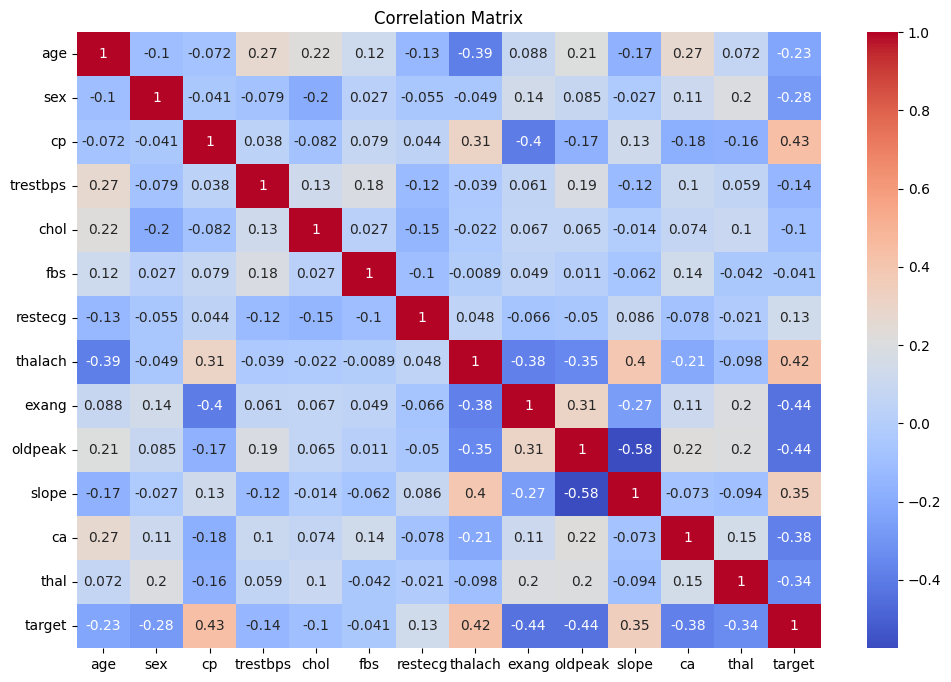

In [ ]:
# Data Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


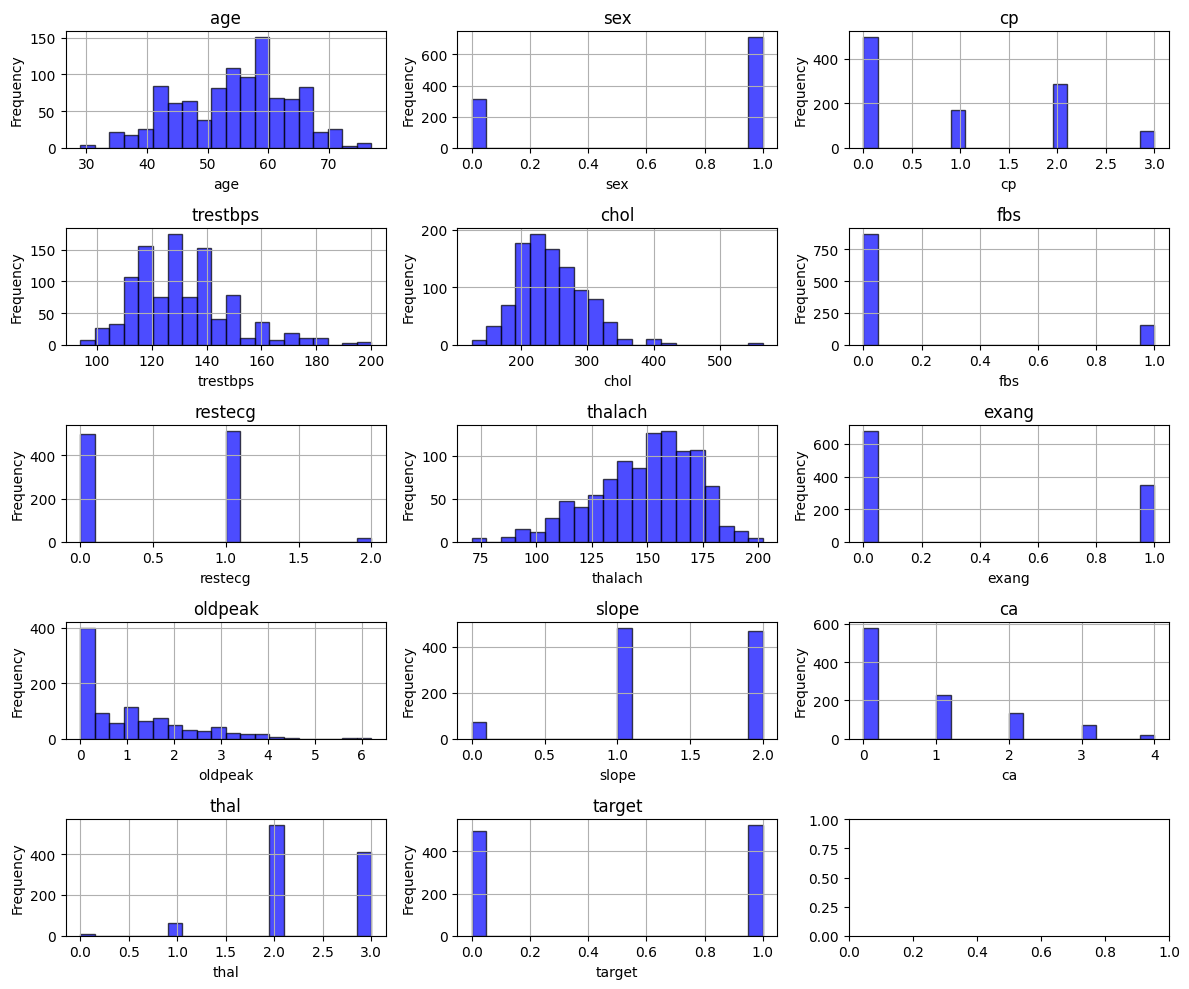

In [ ]:
# 1.2 Data Visualization - Histograms with Axis Labels
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 10))  # Adjust grid size based on the number of features
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(df.columns):
    df[col].hist(ax=axes[i], bins=20, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(col)  # Set title for each histogram
    axes[i].set_xlabel(col)  # X-axis label (Feature Name)
    axes[i].set_ylabel("Frequency")  # Y-axis label

plt.tight_layout()
plt.show()



Custom Logistic Regression Accuracy: 0.7902439024390244

Sklearn Logistic Regression Accuracy: 0.7951219512195122
Random Forest Accuracy: 0.9853658536585366

Best Random Forest Accuracy: 0.9853658536585366

Selected Features: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Final Model Accuracy: 0.9951219512195122

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



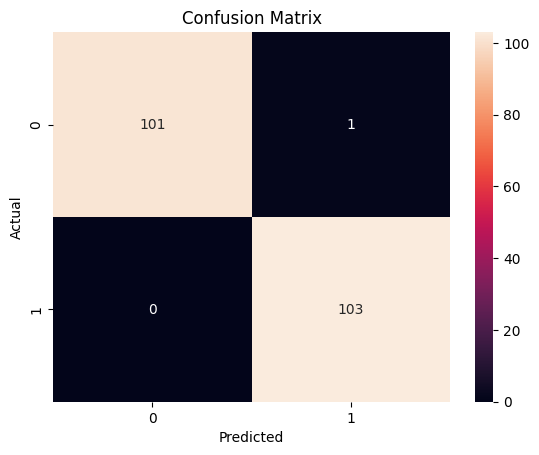

In [ ]:




# Data Preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Logistic Regression from scratch (simplified version)
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Train and evaluate custom model
custom_model = CustomLogisticRegression()
custom_model.fit(X_train_scaled, y_train)
custom_pred = custom_model.predict(X_test_scaled)
print("\nCustom Logistic Regression Accuracy:", accuracy_score(y_test, custom_pred))

# Build primary models using sklearn
# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print("\nSklearn Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_pred = best_rf.predict(X_test)
print("\nBest Random Forest Accuracy:", accuracy_score(y_test, best_pred))

# Feature Selection
selector = SelectKBest(f_classif, k=8)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", list(selected_features))

# Final Model with Selected Features and Tuned Parameters
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

final_rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
final_rf.fit(X_train_sel, y_train)
final_pred = final_rf.predict(X_test_sel)
print("\nFinal Model Accuracy:", accuracy_score(y_test, final_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, final_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, final_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()